# Rossmann Store Sales



# Bibliotheken importieren



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize':(20,10)})

## Daten importieren

In [2]:
import pandas as pd
from pandas.api.types import CategoricalDtype
# pd.set_option('display.max_columns', None)

dtypes_train = {
    'Store' : 'int',
    'DayOfWeek' : 'category',
    'Sales' : 'int',
    'Customers' : 'int',
    'Open' : 'bool',
    'Promo' : 'bool',
    'StateHoliday' : 'category',
    'SchoolHoliday' : 'bool'
}
train = pd.read_csv('train.csv', parse_dates = ['Date'], dtype = dtypes_train)
# display(train.info())
# display(train.head())

dtypes_store = {
    'Store' : 'int',
    'StoreType' : 'category',
    'Assortment' : 'category',
    'CompetitionDistance' : 'object',
    'CompetitionOpenSinceMonth' : 'object',
    'CompetitionOpenSinceYear' : 'object',
    'Promo2' : 'bool',
    'Promo2SinceWeek' : 'object',
    'Promo2SinceYear' : 'object',
    'PromoInterval' : 'object'
}

store = pd.read_csv('store.csv', dtype = dtypes_store)
# display(store.info())
# display(store.head())

demand = train.merge(store, how = 'inner', on = 'Store')
demand.set_index(['Date'], inplace = True)
demand.sort_index(axis = 0, ascending = True, inplace = True)
display(demand.info())
display(demand.head())
# display(daily_demand.info())
# display(daily_demand.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2013-01-01 to 2015-07-31
Data columns (total 17 columns):
 #   Column                     Non-Null Count    Dtype   
---  ------                     --------------    -----   
 0   Store                      1017209 non-null  int64   
 1   DayOfWeek                  1017209 non-null  category
 2   Sales                      1017209 non-null  int64   
 3   Customers                  1017209 non-null  int64   
 4   Open                       1017209 non-null  bool    
 5   Promo                      1017209 non-null  bool    
 6   StateHoliday               1017209 non-null  category
 7   SchoolHoliday              1017209 non-null  bool    
 8   StoreType                  1017209 non-null  category
 9   Assortment                 1017209 non-null  category
 10  CompetitionDistance        1014567 non-null  object  
 11  CompetitionOpenSinceMonth  693861 non-null   object  
 12  CompetitionOpenSinceYear   693861 non-nul

None

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Date,,,,,,,,,,,,,,,,,
2013-01-01,1115,2,0,0,False,False,a,True,d,c,5350,NaN,NaN,True,22,2012,"Mar,Jun,Sept,Dec"
2013-01-01,746,2,0,0,False,False,a,True,d,c,4330,2,2011,True,35,2011,"Mar,Jun,Sept,Dec"
2013-01-01,171,2,0,0,False,False,a,True,a,a,2640,NaN,NaN,False,NaN,NaN,NaN
2013-01-01,694,2,0,0,False,False,a,True,a,c,460,11,2012,True,40,2014,"Jan,Apr,Jul,Oct"
2013-01-01,396,2,0,0,False,False,a,True,a,c,23130,NaN,NaN,False,NaN,NaN,NaN


# Daten vorbereiten

In [3]:
demand['StateHoliday'] = demand['StateHoliday'].replace(to_replace = ['0','a','b','c'], value = ['None', 'Public holiday', 'Easter', 'Christmas']).astype('category')
demand['Assortment'] = demand['Assortment'].replace(to_replace = ['a','b','c'], value = ['basic', 'extra', 'extended']).astype('category')
demand['DayOfWeek'] = demand['DayOfWeek'].replace(to_replace = ['1','2','3','4','5','6','7'], value = ['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday']).astype('category')

display(demand.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2013-01-01 to 2015-07-31
Data columns (total 17 columns):
 #   Column                     Non-Null Count    Dtype   
---  ------                     --------------    -----   
 0   Store                      1017209 non-null  int64   
 1   DayOfWeek                  1017209 non-null  category
 2   Sales                      1017209 non-null  int64   
 3   Customers                  1017209 non-null  int64   
 4   Open                       1017209 non-null  bool    
 5   Promo                      1017209 non-null  bool    
 6   StateHoliday               1017209 non-null  category
 7   SchoolHoliday              1017209 non-null  bool    
 8   StoreType                  1017209 non-null  category
 9   Assortment                 1017209 non-null  category
 10  CompetitionDistance        1014567 non-null  object  
 11  CompetitionOpenSinceMonth  693861 non-null   object  
 12  CompetitionOpenSinceYear   693861 non-nul

None

## Visualisieren & Aufbereiten

### Korrelationsdiagramme

<AxesSubplot:xlabel='SchoolHoliday', ylabel='Sales'>

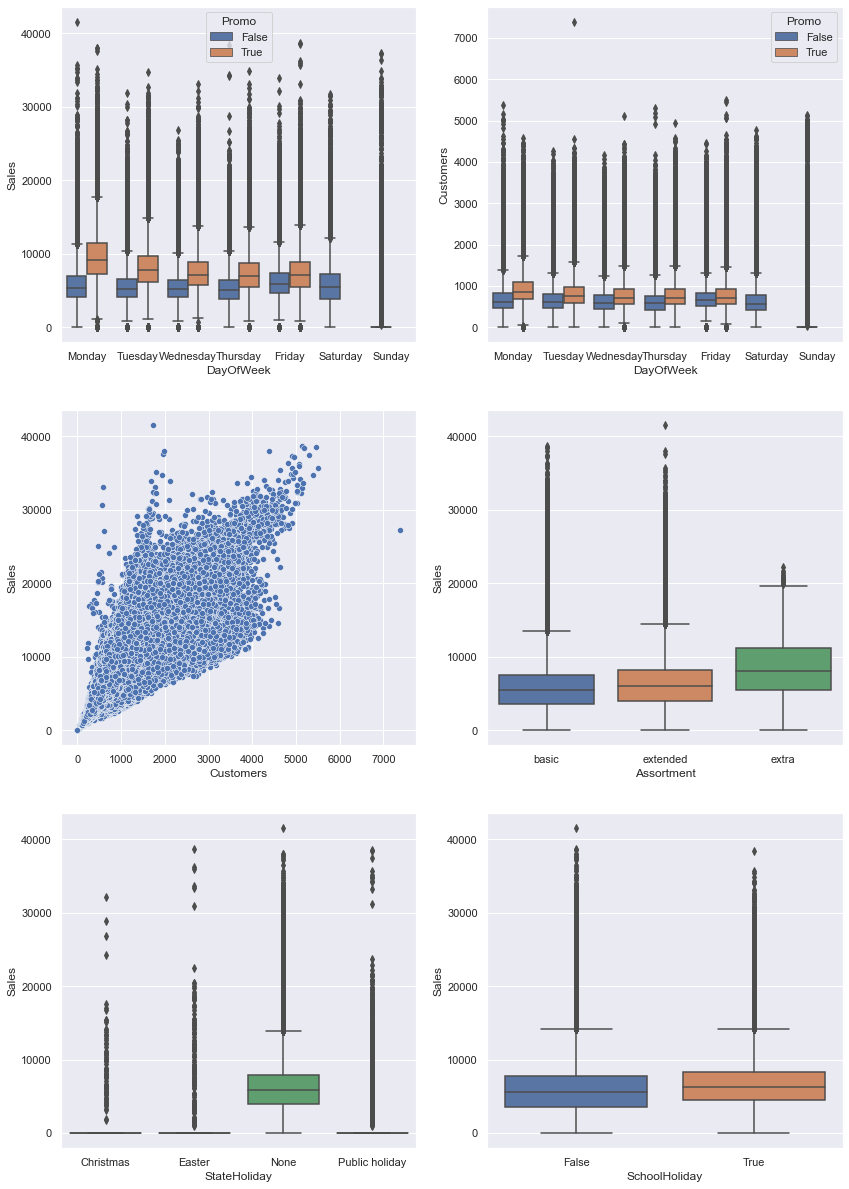

In [4]:
rows, cols = 3, 2
fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(7*cols, 7*rows))
axs = axs.flatten()


sns.boxplot(x = 'DayOfWeek', y = "Sales", hue = 'Promo', data = demand, ax = axs[0], order = ['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday'])
sns.boxplot(x = 'DayOfWeek', y = "Customers", hue = 'Promo', data = demand, ax = axs[1], order = ['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday'])
sns.scatterplot(x = 'Customers', y = "Sales", data = demand, ax = axs[2])
sns.boxplot(x = 'Assortment', y = "Sales", data = demand, ax = axs[3])
sns.boxplot(x = 'StateHoliday', y = "Sales", data = demand, ax = axs[4])
sns.boxplot(x = 'SchoolHoliday', y = "Sales", data = demand, ax = axs[5])

### Transformationen und Anpassungen

### Kodierungen

In [4]:
import datetime as dt

data = demand[demand.Store == 1].copy()

# bool'sche Variablen
for col in ['Open', 'SchoolHoliday', 'Promo']:
    data[col] = data[col].replace(to_replace = [True, False], value = [1,0]).astype('int')

# kategorische Variablen
data = pd.get_dummies(data, columns = ['DayOfWeek', 'StateHoliday'], drop_first = False)

# Trend
data['Trend'] = data.index.map(dt.datetime.toordinal)

x = data.drop(columns = 
              [
               'Sales',
               'Store',
               'Customers',
               'StoreType',
               'Assortment',
               'CompetitionDistance',
               'CompetitionOpenSinceMonth',
               'CompetitionOpenSinceYear',
               'Promo2',
               'Promo2SinceWeek',
               'Promo2SinceYear',
               'PromoInterval'
              ]
)

y = data[['Sales']]

display(x)
display(y)

,Open,Promo,SchoolHoliday,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,StateHoliday_Christmas,StateHoliday_Easter,StateHoliday_None,StateHoliday_Public holiday,Trend
Date,,,,,,,,,,,,,,,
2013-01-01,0,0,1,0,0,0,0,0,1,0,0,0,0,1,734869
2013-01-02,1,0,1,0,0,0,0,0,0,1,0,0,1,0,734870
2013-01-03,1,0,1,0,0,0,0,1,0,0,0,0,1,0,734871
2013-01-04,1,0,1,1,0,0,0,0,0,0,0,0,1,0,734872
2013-01-05,1,0,1,0,0,1,0,0,0,0,0,0,1,0,734873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-07-27,1,1,1,0,1,0,0,0,0,0,0,0,1,0,735806
2015-07-28,1,1,1,0,0,0,0,0,1,0,0,0,1,0,735807
2015-07-29,1,1,1,0,0,0,0,0,0,1,0,0,1,0,735808


,Sales
Date,
2013-01-01,0
2013-01-02,5530
2013-01-03,4327
2013-01-04,4486
2013-01-05,4997
...,...
2015-07-27,6102
2015-07-28,5011
2015-07-29,4782


## Modellieren und Schätzen
### Regressionsmodelle
#### Lineare Regression

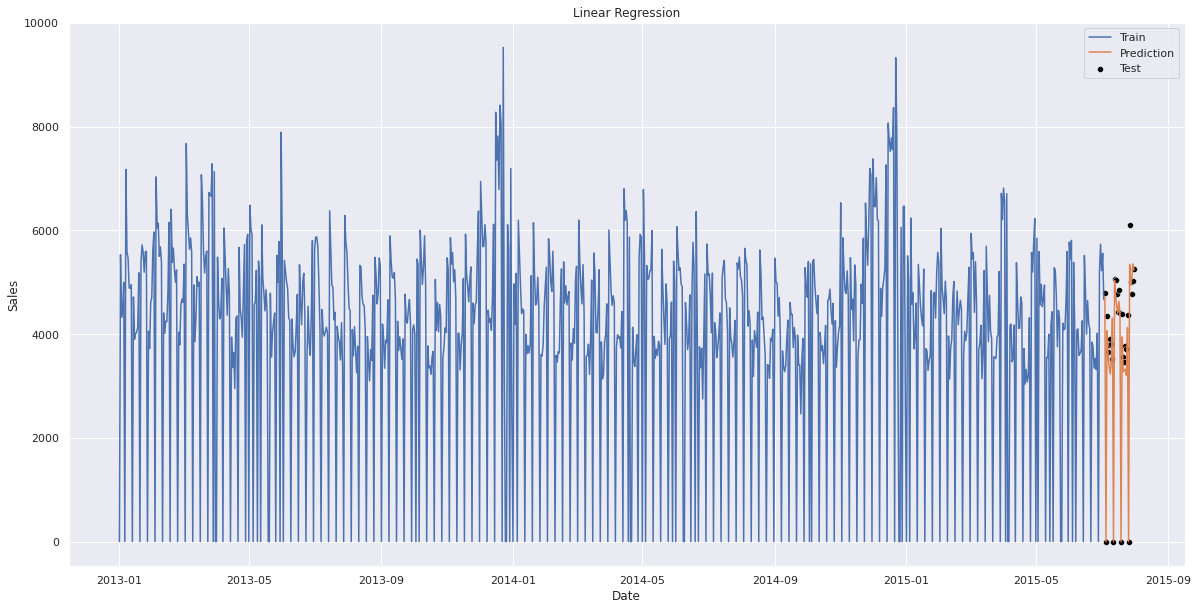

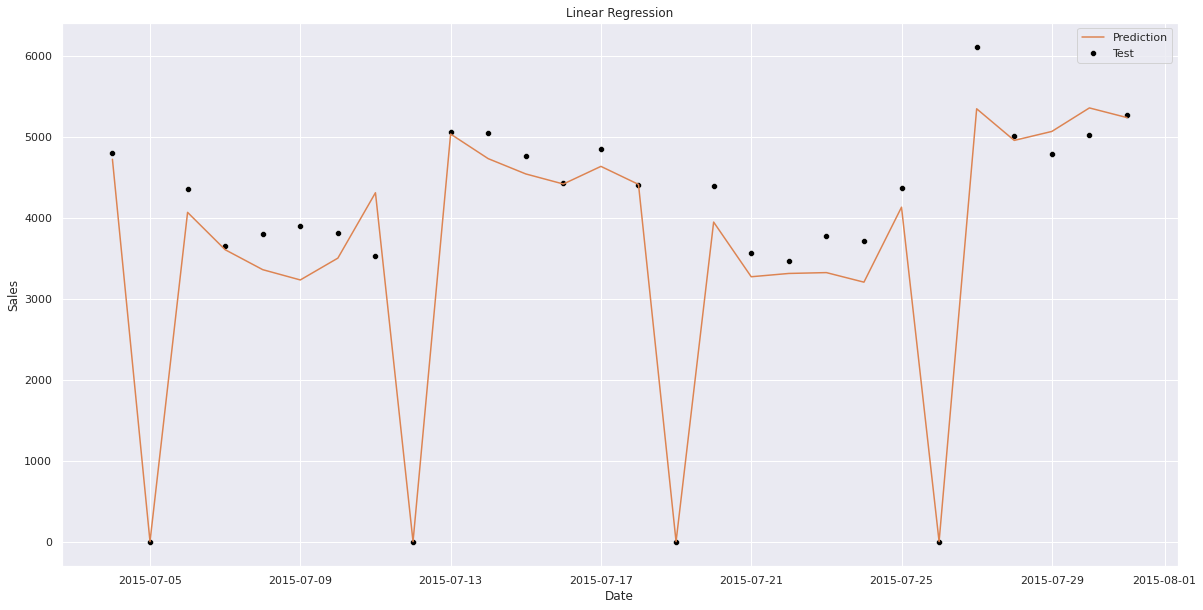

MAE:	 247.90


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=28, shuffle = False)

forecast = LinearRegression().fit(x_train, y_train)

prediction = pd.DataFrame(data = forecast.predict(x_test), index = pd.date_range(start = x_test.index.min(), end = x_test.index.max()))
prediction.index.name = 'Date'
prediction.columns = ['Sales']

prediction[prediction.Sales < 0] = 0

#display(prediction)

sns.lineplot(data = y_train['Sales'], label = 'Train')
sns.scatterplot(data = y_test['Sales'], color = 'black', label = 'Test')
sns.lineplot(data = prediction['Sales'], label = 'Prediction')
plt.title('Linear Regression')
plt.show()

sns.scatterplot(data = y_test['Sales'], color = 'black', label = 'Test')
sns.lineplot(data = prediction['Sales'], color = sns.color_palette('deep').as_hex()[1], label = 'Prediction')
plt.title('Linear Regression')
plt.show()

print('MAE:\t %4.2f' % (MAE(y_true = y_test['Sales'], y_pred = prediction['Sales'])))

##### Residualanalyse

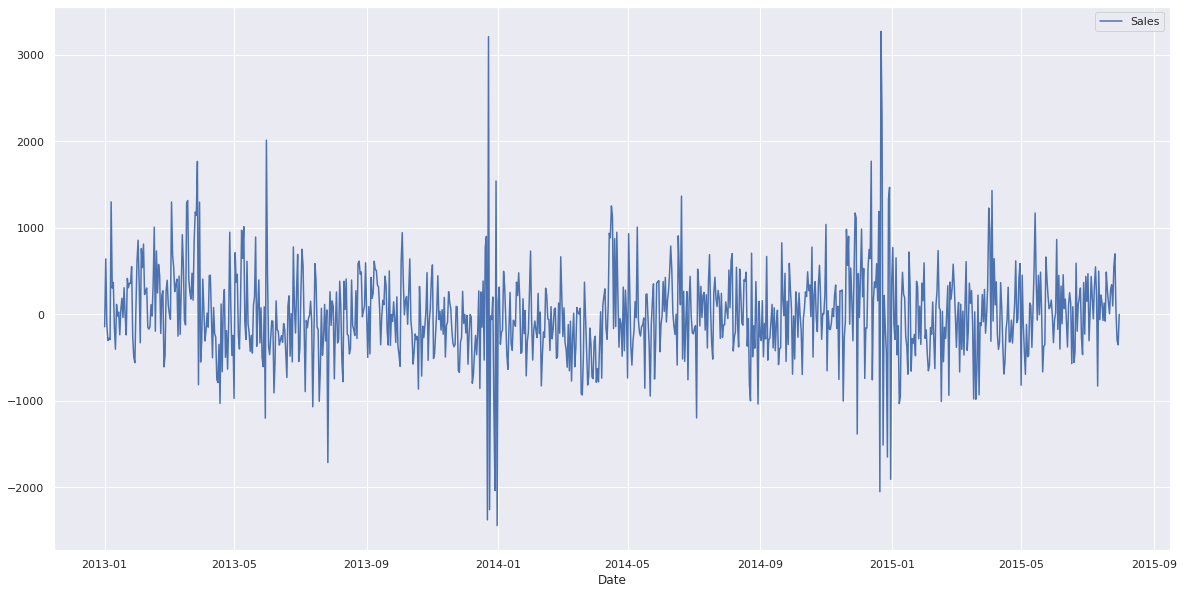

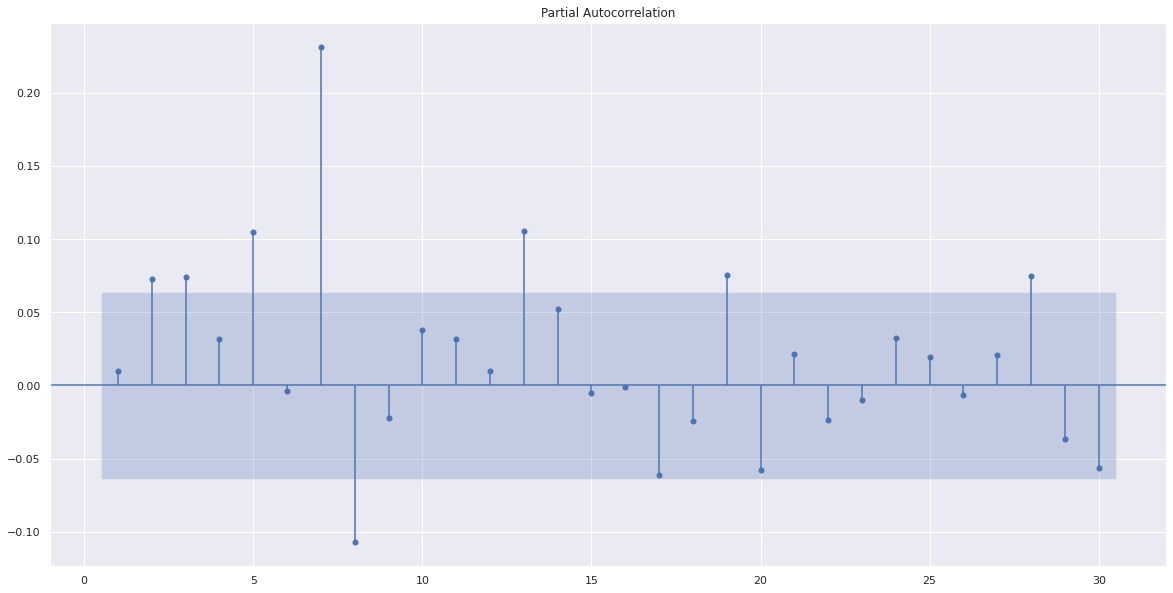

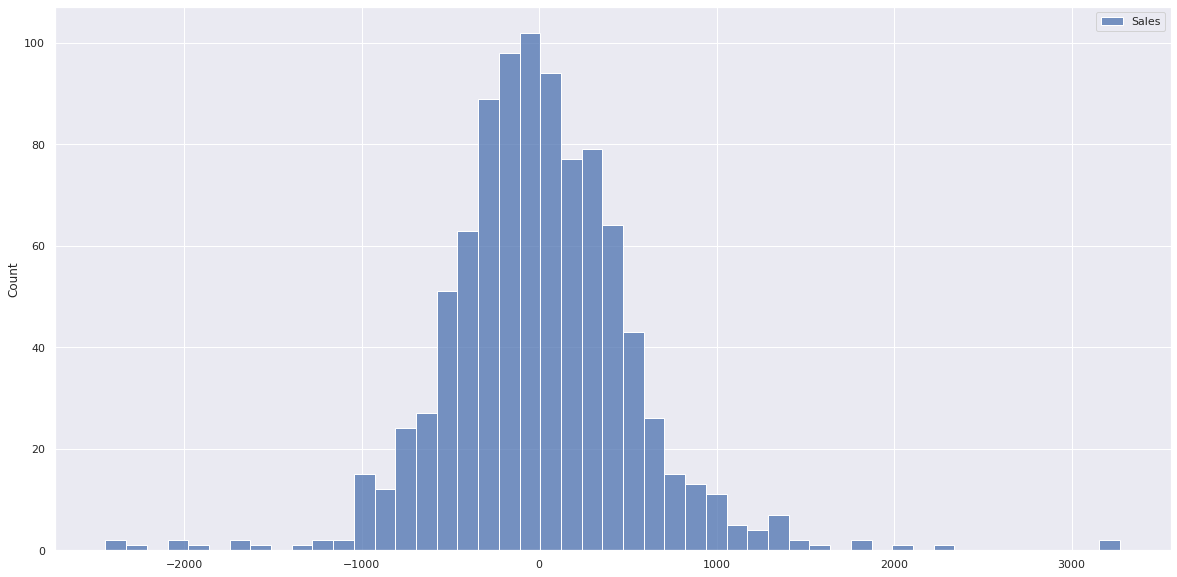

,Sales
Date,
2014-12-22,3272.811523
2013-12-23,3212.267090
2014-12-23,2297.231689
2013-05-31,2015.044861
2014-12-13,1771.468201
2013-03-28,1769.296631
2013-12-30,1542.720398
2014-12-30,1469.684998
2015-04-04,1432.104370


,Store,Sales,Customers,Open,Promo,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,...,WeekOfYear_43,WeekOfYear_44,WeekOfYear_45,WeekOfYear_46,WeekOfYear_47,WeekOfYear_48,WeekOfYear_49,WeekOfYear_50,WeekOfYear_51,WeekOfYear_52
Date,,,,,,,,,,,,,,,,,,,,,
2013-12-25,1,0,0,0,0,1,c,basic,1270,9,...,0,0,0,0,0,0,0,0,0,1
2013-12-26,1,0,0,0,0,1,c,basic,1270,9,...,0,0,0,0,0,0,0,0,0,1
2014-12-25,1,0,0,0,0,1,c,basic,1270,9,...,0,0,0,0,0,0,0,0,0,1
2014-12-26,1,0,0,0,0,1,c,basic,1270,9,...,0,0,0,0,0,0,0,0,0,1


In [9]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

forecast = LinearRegression().fit(x, y)

residuals = y - forecast.predict(x)

sns.lineplot(data = residuals)
plt.show
plot_pacf(residuals.dropna(), zero = False)
plt.show()
sns.histplot(residuals)
plt.show()

display(residuals.sort_values(by = 'Sales', ascending = False).head(20))
display(data[data.StateHoliday_Christmas == 1])

#### Random Forest

Fitting 33 folds for each of 10 candidates, totalling 330 fits


RandomForestRegressor(max_depth=7)

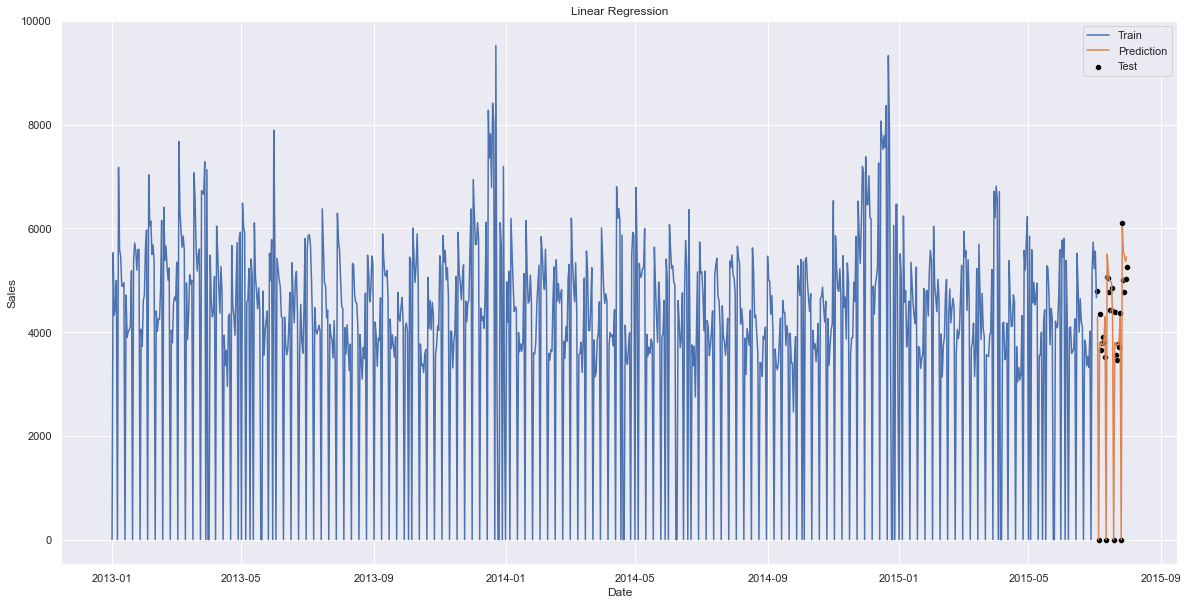

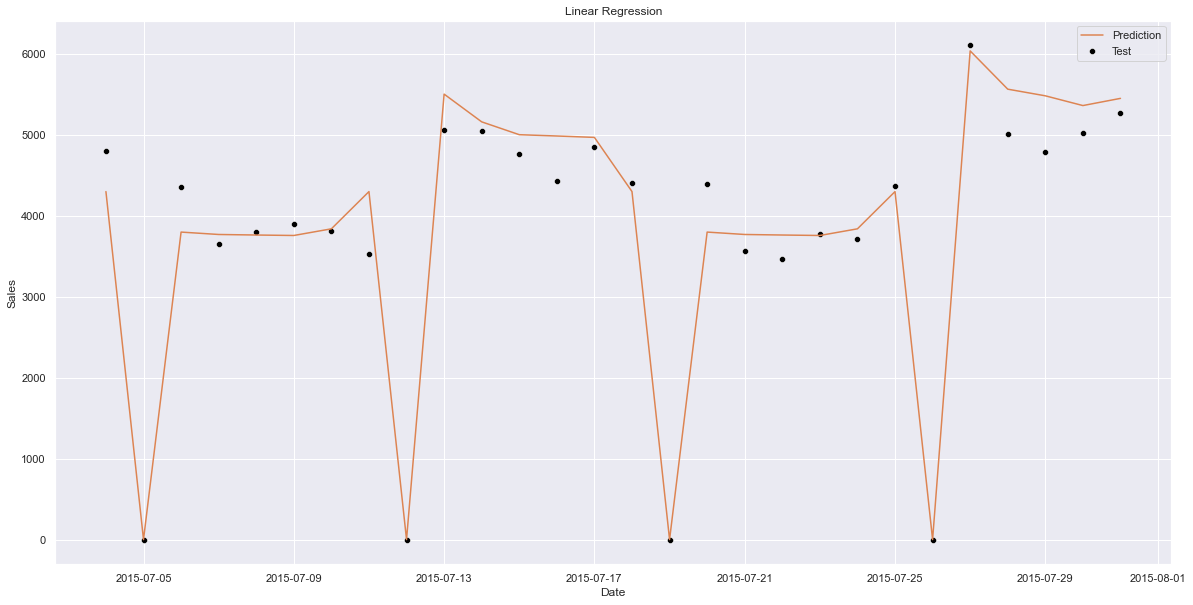

MAE:	 245.91


,Importance
Open,0.841950
Trend,0.061757
Promo,0.052404
DayOfWeek_Saturday,0.021668
DayOfWeek_Monday,0.010833
SchoolHoliday,0.006392
DayOfWeek_Friday,0.001942
DayOfWeek_Tuesday,0.001649
DayOfWeek_Thursday,0.001081
DayOfWeek_Wednesday,0.000325


In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error as MAE

k = np.floor(len(data)/28).astype(int)
cv = KFold(n_splits = k)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=28, shuffle = False)

param_grid = [
    {'max_depth': (np.arange(10) + 1)}
]

forecast = RandomForestRegressor()
search = RandomizedSearchCV(
                            estimator = forecast,
                            param_distributions = param_grid,
                            n_iter = 10,
                            scoring = 'neg_mean_absolute_error',
                            cv = cv,
                            verbose = 1,
                            random_state = 42
)
search.fit(x_train, y_train.values.ravel())

display(search.best_estimator_)

forecast = search.best_estimator_.fit(x_train, y_train.values.ravel())

prediction = pd.DataFrame(data = forecast.predict(x_test), index = pd.date_range(start = x_test.index.min(), end = x_test.index.max()))
prediction.index.name = 'Date'
prediction.columns = ['Sales']
prediction[prediction.Sales < 0] = 0

#display(prediction)

sns.lineplot(data = y_train['Sales'], label = 'Train')
sns.scatterplot(data = y_test['Sales'], color = 'black', label = 'Test')
sns.lineplot(data = prediction['Sales'], label = 'Prediction')
plt.title('Linear Regression')
plt.show()

sns.scatterplot(data = y_test['Sales'], color = 'black', label = 'Test')
sns.lineplot(data = prediction['Sales'], color = sns.color_palette('deep').as_hex()[1], label = 'Prediction')
plt.title('Linear Regression')
plt.show()

print('MAE:\t %4.2f' % (MAE(y_true = y_test['Sales'], y_pred = prediction['Sales'])))

# summarize feature importance
importance = pd.DataFrame(data = forecast.feature_importances_, index = x.columns)
importance.columns = ['Importance']
display(importance.sort_values(by='Importance', ascending = False))

## Evaluieren
### Kreuzvalidierung
#### Regressionsmodelle
##### Lineare Regression

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_validate

k = np.floor(len(data)/28).astype(int)
# k = len(data)

cv = KFold(n_splits = k)
# cv = TimeSeriesSplit(n_splits = 10, max_train_size = None, test_size = 28, gap = 0)

forecast = LinearRegression()
scores = pd.DataFrame(
    cross_validate(
        forecast,
        x,
        y,
        scoring = 'neg_mean_absolute_error',
        cv = cv,
        verbose = 1
    )
)
# display(scores)

print('MAE mean:\t %4.2f' % (-scores['test_score'].mean()))
print('MAE mad:\t %4.2f' % (scores['test_score'].mad()))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


MAE mean:	 504.96
MAE mad:	 156.69


[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.9s finished


##### Random Forest

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_error as MAE

k = np.floor(len(data)/28).astype(int)
cv = KFold(n_splits = k)

forecast = RandomForestRegressor(max_depth = 7)

scores = pd.DataFrame(
    cross_validate(
        forecast,
        x,
        y.values.ravel(),
        scoring = 'neg_mean_absolute_error',
        cv = cv,
        verbose = 1,
    )
)

print('MAE mean:\t %4.2f' % (-scores['test_score'].mean()))
print('MAE mad:\t %4.2f' % (scores['test_score'].mad()))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


MAE mean:	 472.95
MAE mad:	 180.36


[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    4.3s finished


#### Autogregressionsmodelle

##### Naive

In [6]:
from sktime.forecasting.model_evaluation import evaluate
from sktime.forecasting.model_selection import ExpandingWindowSplitter
from sktime.forecasting.naive import NaiveForecaster
from sktime.performance_metrics.forecasting import MeanAbsoluteError 

data.index.freq = 'D'

cv = ExpandingWindowSplitter(
    fh = 28,
    initial_window = len(data)-12*28,
    step_length=28
)

MAE = MeanAbsoluteError()

forecast = NaiveForecaster(strategy="last", sp=7)

scores = evaluate(
    forecaster = forecast,
    cv = cv,
    y = y['Sales'],
    strategy = 'refit',
    scoring = MAE
)

# display(results)

print('MAE mean:\t %4.2f' % (scores['test_MeanAbsoluteError'].mean()))
print('MAE mad:\t %4.2f' % ((scores['test_MeanAbsoluteError'].mad())))

MAE mean:	 1056.83
MAE mad:	 720.75


##### Exponential Smoothing

In [7]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import ForecastingGridSearchCV
from sktime.forecasting.model_selection import ExpandingWindowSplitter
from sktime.forecasting.model_evaluation import evaluate
from sktime.performance_metrics.forecasting import MeanAbsoluteError

data.index.freq = 'D'

cv = ExpandingWindowSplitter(
    fh = 28,
    initial_window = len(y)-12*28,
    step_length=28
)

MAE = MeanAbsoluteError()

ets = ExponentialSmoothing(
     damped_trend = True,
     seasonal = 'add',
     sp = 21,
     trend = 'add'
) 

scores = evaluate(
    forecaster = ets,
    cv = cv,
    y = y['Sales'],
    strategy = 'refit',
    scoring = MAE
)

print('MAE mean:\t %4.2f' % (scores['test_MeanAbsoluteError'].mean()))
print('MAE mad:\t %4.2f' % ((scores['test_MeanAbsoluteError'].mad())))

/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
/srv/conda/envs/notebook/lib/python3.7/site-packages/st

MAE mean:	 918.06
MAE mad:	 593.92


/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


## Visualisieren & Aufbereiten
### Merkmalsauswahl
#### Kodierung weiterer Merkmale

In [5]:
# Monat
data['Month'] = data.index.month_name()
data = pd.get_dummies(data, columns = ['Month'], drop_first = False)

# Tag im Monat
data['DayOfMonth'] = data.index.day
data = pd.get_dummies(data, columns = ['DayOfMonth'], drop_first = False)

# Woche im Jahr
# data['WeekOfYear'] = data.index.isocalendar().week
# data = pd.get_dummies(data, columns = ['WeekOfYear'], drop_first = False)

x = data.drop(columns = 
              [
               'Sales',
               'Store',
               'Customers',
               'StoreType',
               'Assortment',
               'CompetitionDistance',
               'CompetitionOpenSinceMonth',
               'CompetitionOpenSinceYear',
               'Promo2',
               'Promo2SinceWeek',
               'Promo2SinceYear',
               'PromoInterval'
              ]
)

y = data[['Sales']]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 942 entries, 2013-01-01 to 2015-07-31
Columns: 110 entries, Open to WeekOfYear_52
dtypes: int64(4), uint8(106)
memory usage: 134.3 KB


None

#### Evaluation 

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_error as MAE

k = np.floor(len(data)/28).astype(int)
cv = KFold(n_splits = k)

forecast = RandomForestRegressor(max_depth = 7)

scores = pd.DataFrame(
    cross_validate(
        forecast,
        x,
        y.values.ravel(),
        scoring = 'neg_mean_absolute_error',
        cv = cv,
        verbose = 1,
    )
)

print('MAE mean:\t %4.2f' % (-scores['test_score'].mean()))
print('MAE mad:\t %4.2f' % (scores['test_score'].mad()))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


MAE mean:	 404.30
MAE mad:	 114.51


[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    8.8s finished


#### Merkmalsauswahl
##### Beschreibung Merkmalsbedeutung

In [7]:
forecast.fit(x, y.values.ravel())
importance = pd.DataFrame(data = forecast.feature_importances_, index = x.columns)
importance.columns = ['Importance']
display(importance.sort_values(by='Importance', ascending = False))
display(x.shape)

,Importance
Open,0.827874
Promo,0.050575
Month_December,0.027779
DayOfWeek_Saturday,0.021184
Trend,0.016056
...,...
WeekOfYear_41,0.000000
WeekOfYear_24,0.000000
WeekOfYear_30,0.000000
WeekOfYear_33,0.000000


(942, 110)

##### Automatisierte Merkmalsauswahl

In [10]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold

k = np.floor(len(data)/28).astype(int)
# k = len(data)
cv = KFold(n_splits = k)
# cv = TimeSeriesSplit(n_splits = 10, max_train_size = None, test_size = 28, gap = 0)

# Variablenauswahl

forecast = RandomForestRegressor(max_depth = 7)

selector = RFECV(
    forecast,
    step = 1,
    cv = cv,
    scoring = 'neg_mean_absolute_error'
)

selector = selector.fit(x, y.values.ravel())

selection = pd.DataFrame(data = selector.support_, index = x.columns)
selection.columns = ['Selected']
selection.index.name = 'Variable'
display(selection)

scores = pd.DataFrame(
    cross_validate(
        forecast,
        selector.transform(x),
        y.values.ravel(),
        scoring = 'neg_mean_absolute_error',
        cv = cv,
        verbose = 1,
    )
)

print('MAE mean:\t %4.2f' % (-scores['test_score'].mean()))
print('MAE mad:\t %4.2f' % (scores['test_score'].mad()))

KeyboardInterrupt: 

##### Verknüpfung über Modell-Pipeline

In [24]:
from sklearn.pipeline import Pipeline

k = np.floor(len(data)/28).astype(int)
cv = KFold(n_splits = k)

forecast = RandomForestRegressor(max_depth = 7)

selector = RFECV(
    forecast,
    step = 1,
    cv = cv,
    scoring = 'neg_mean_absolute_error'
)

pipeline = Pipeline([
    ('selector', selector),
    ('forecaster', forecast)
])

scores = pd.DataFrame(
    cross_validate(
        pipeline,
        x,
        y.values.ravel(),
        scoring = 'neg_mean_absolute_error',
        cv = cv,
        verbose = 1,
    )
)

print('MAE mean:\t %4.2f' % (-scores['test_score'].mean()))
print('MAE mad:\t %4.2f' % (scores['test_score'].mad()))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


MAE mean:	 523.37
MAE mad:	 109.28


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   48.1s finished


In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

forecast = LinearRegression().fit(x, y)

residuals = y - forecast.predict(x)

sns.lineplot(data = residuals)
plt.show
plot_pacf(residuals.dropna(), zero = False)
plt.show()
sns.histplot(residuals)
plt.show()

display(residuals.sort_values(by = 'Sales', ascending = False).head(20))
display(data[data.StateHoliday_Christmas == 1])

## Evaluieren
### Forecast Value Added

| Methode / Verfahren                                | Mean Absolute Error (CV) | Forecast Value Added | Forecast Value Added % |
| -------------------------------------------------- | ------------------------ | -------------------- | ---------------------- |
| Naїve Forecast                                     | 1056,83                  |                      |                        |
| Exponential Smoothing                              | 918,06                   | 138,77               | 13,13%                 |
| Lineare Regression                                 | 504,96                   | 551,87               | 52,22%                 |
| Random Forest                                      | 472,95                   | 583,88               | 55,25%                 |
| Random Forest + weitere Merkmale                   | 413,32                   | 643,51               | 60,89%                 |
| Random Forest + weitere Merkmale + Merkmalsauswahl | 413,22                   | 643,61               | 60,90%                 |